In [316]:
# Import dependencies and setup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import matplotlib.dates as matplotlibdates
from matplotlib.dates import date2num
import datetime
import dataframe_image as dfi
import seaborn as sns
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

import warnings
warnings.filterwarnings('ignore')

In [311]:
# Read csv files and store as DataFrames

seq_water_path = "Resources/dam_levels/seq_water_grid.csv"
seq_water_df = pd.read_csv(seq_water_path)

alderley_rainfall_path = "Resources/rainfall/alderley_rainfall.csv"
alderley_df = pd.read_csv(alderley_rainfall_path)

dam_locations_path = "Resources/dam_locations.csv"
dam_locations_df = pd.read_csv(dam_locations_path)

seq_water_df

,Name,Date,Last Observation (%),Last Observation (ML)
0,SEQ Water Grid,04/03/2017,70.9,1562083.85
1,SEQ Water Grid,05/03/2017,70.9,1562306.15
2,SEQ Water Grid,06/03/2017,70.8,1560544.56
3,SEQ Water Grid,07/03/2017,70.7,1557157.48
4,SEQ Water Grid,08/03/2017,70.6,1554735.70
...,...,...,...,...
1822,SEQ Water Grid,28/02/2022,96.8,2132800.79
1823,SEQ Water Grid,01/03/2022,96.8,2131911.57
1824,SEQ Water Grid,02/03/2022,93.0,2048657.55
1825,SEQ Water Grid,03/03/2022,94.0,2069539.68


In [163]:
# Convert 'Date' columns in all .csvs to datetime

seq_water_df['Date'] = pd.to_datetime(seq_water_df['Date'], format="%d/%m/%Y")
seq_water_df.dtypes

Name                             object
Date                     datetime64[ns]
Last Observation (%)            float64
Last Observation (ML)           float64
dtype: object

In [164]:
# # Group by month, calculate monthly totals and averages, add to DataFrame

# month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
#                'July', 'August', 'September', 'October', 'November', 'December']

# seq_water_monthly_df = seq_water_df.groupby(pd.Grouper(key='Date', freq='1M')).sum()
# seq_water_monthly_df.index = seq_water_monthly_df.index.strftime('%B')
# seq_water_monthly_df = seq_water_monthly_df.groupby(['Date']).sum().reset_index()
# seq_water_monthly_df['Date'] = pd.Categorical(seq_water_monthly_df['Date'], month_order)
# seq_water_monthly_df = seq_water_monthly_df.sort_values('Date')

# seq_water_monthly_df

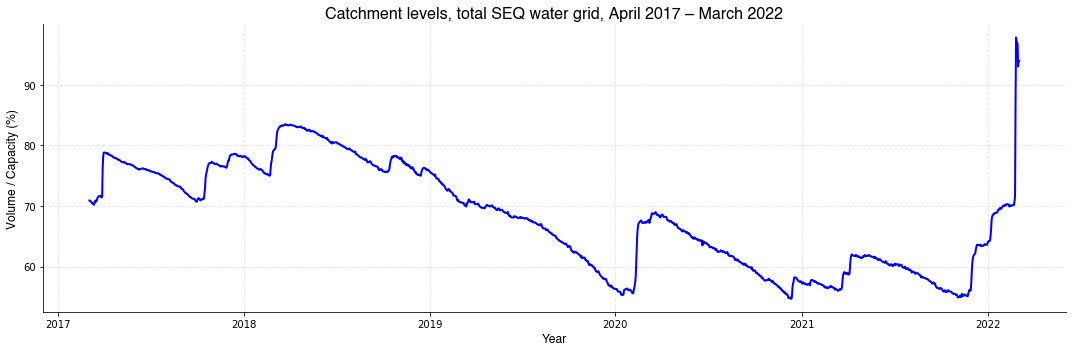

In [165]:
# Plot - SEQ Water Grid, Catchment levels (Volume/Capacity)

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

plt.figure(figsize=(15,5))
plt.plot(seq_water_df['Date'], seq_water_df['Last Observation (%)'], color="blue", markersize='7', 
         linewidth=2)

plt.title('Catchment levels, total SEQ water grid, April 2017 – March 2022', fontdict = font_1)
plt.xlabel('Year', fontdict = font_2)
plt.ylabel('Volume / Capacity (%)', fontdict = font_2)

# Aesthetics

matplotlib.pyplot.grid(visible=True, which='both', axis='both', 
                       color='blue', alpha=0.1, dash_capstyle='butt', dash_joinstyle='bevel', 
                       linestyle='--', linewidth=1)
            
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/seq-dam-levels/Images/seq_catchment_levels.png", 
            transparent=False, dpi=300)
plt.show()

In [166]:
# Preview SEQ rainfall DataFrame

alderley_df

,year,month,day,amount_mm
0,1899,1,1,NaN
1,1899,1,2,NaN
2,1899,1,3,NaN
3,1899,1,4,NaN
4,1899,1,5,NaN
...,...,...,...,...
44983,2022,2,28,344.8
44984,2022,3,1,2.8
44985,2022,3,2,0.0
44986,2022,3,3,26.0


In [167]:
# Drop NaN value rows

filtered_alderley_df = alderley_df[alderley_df['amount_mm'].notnull()]
filtered_alderley_df

,year,month,day,amount_mm
196,1899,7,16,0.0
197,1899,7,17,2.5
198,1899,7,18,0.0
199,1899,7,19,0.0
200,1899,7,20,0.0
...,...,...,...,...
44983,2022,2,28,344.8
44984,2022,3,1,2.8
44985,2022,3,2,0.0
44986,2022,3,3,26.0


In [168]:
# Convert filtered_alderley_df to datetime

filtered_alderley_df['date'] = pd.to_datetime(filtered_alderley_df[['year', 'month', 'day']])
filtered_alderley_df.dtypes

year                  int64
month                 int64
day                   int64
amount_mm           float64
date         datetime64[ns]
dtype: object

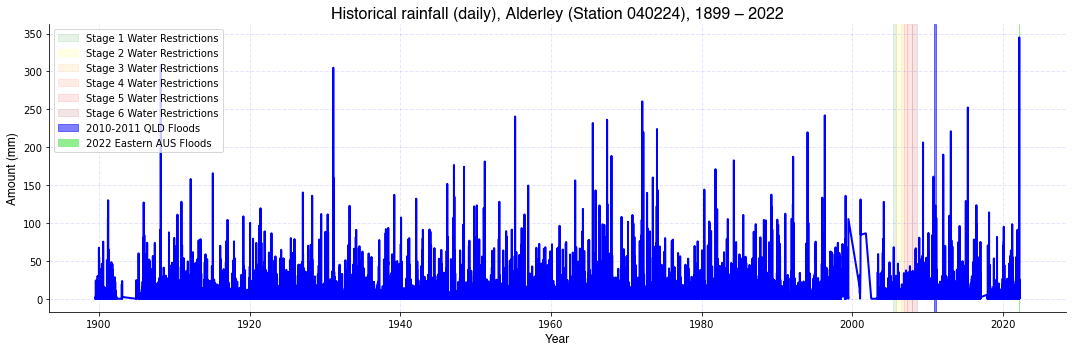

In [277]:
# Plot - Historical rainfall

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

plt.figure(figsize=(15,5))
plt.plot(filtered_alderley_df['date'], filtered_alderley_df['amount_mm'], color="blue", markersize='7', 
         linewidth=2)

plt.title('Historical rainfall (daily), Alderley (Station 040224), 1899 – 2022', fontdict = font_1)
plt.xlabel('Year', fontdict = font_2)
plt.ylabel('Amount (mm)', fontdict = font_2)

# Aesthetics

matplotlib.pyplot.grid(visible=True, which='both', axis='both', 
                       color='blue', alpha=0.1, dash_capstyle='butt', dash_joinstyle='bevel', 
                       linestyle='--', linewidth=1)

# Highlights
plt.axvspan(date2num(datetime.datetime(2005,5,13)), date2num(datetime.datetime(2005,10,3)), 
           label="Stage 1 Water Restrictions", color="green", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2005,10,3)), date2num(datetime.datetime(2006,6,13)), 
           label="Stage 2 Water Restrictions", color="yellow", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2006,6,13)), date2num(datetime.datetime(2006,11,1)), 
           label="Stage 3 Water Restrictions", color="orange", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2006,11,1)), date2num(datetime.datetime(2007,4,10)), 
           label="Stage 4 Water Restrictions", color="orangered", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2007,4,10)), date2num(datetime.datetime(2007,11,23)), 
           label="Stage 5 Water Restrictions", color="red", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2007,11,23)), date2num(datetime.datetime(2008,7,21)), 
           label="Stage 6 Water Restrictions", color="darkred", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2010,11,1)), date2num(datetime.datetime(2011,2,1)), 
           label="2010-2011 QLD Floods", color="blue", alpha=0.5)
plt.axvspan(date2num(datetime.datetime(2022,2,23)), date2num(datetime.datetime(2022,3,6)), 
           label="2022 Eastern AUS Floods", color="lightgreen", alpha=1)

plt.legend()

#plt.xticks((filtered_alderley_df['year'])[::1000], rotation=25)
               
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/seq-dam-levels/Images/alderley_historical.png", 
            transparent=False, dpi=300)
plt.show()

In [170]:
# Calculate cumulative rainfall

filtered_alderley_df['cumulative mm'] = filtered_alderley_df['amount_mm'].cumsum()
filtered_alderley_df

,year,month,day,amount_mm,date,cumulative mm
196,1899,7,16,0.0,1899-07-16,0.0
197,1899,7,17,2.5,1899-07-17,2.5
198,1899,7,18,0.0,1899-07-18,2.5
199,1899,7,19,0.0,1899-07-19,2.5
200,1899,7,20,0.0,1899-07-20,2.5
...,...,...,...,...,...,...
44983,2022,2,28,344.8,2022-02-28,133819.6
44984,2022,3,1,2.8,2022-03-01,133822.4
44985,2022,3,2,0.0,2022-03-02,133822.4
44986,2022,3,3,26.0,2022-03-03,133848.4


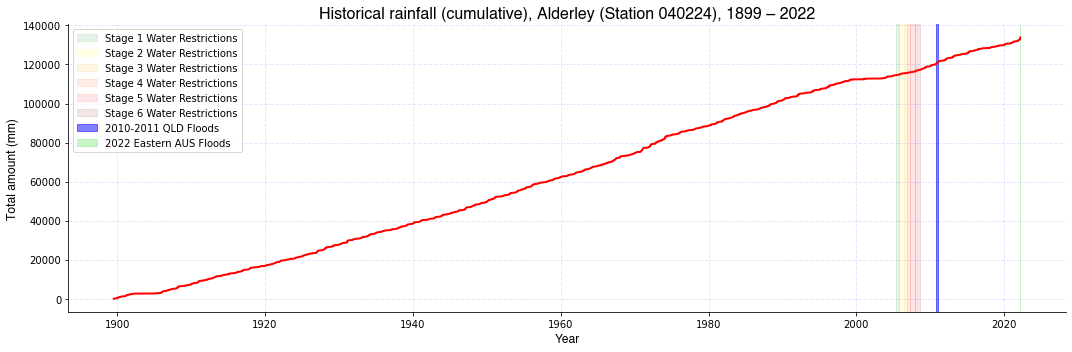

In [279]:
# Plot - Historical rainfall (cumulative)

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

plt.figure(figsize=(15,5))
plt.plot(filtered_alderley_df['date'], filtered_alderley_df['cumulative mm'], color="red", markersize='7', 
         linewidth=2)

plt.title('Historical rainfall (cumulative), Alderley (Station 040224), 1899 – 2022', fontdict = font_1)
plt.xlabel('Year', fontdict = font_2)
plt.ylabel('Total amount (mm)', fontdict = font_2)

# Highlights
plt.axvspan(date2num(datetime.datetime(2005,5,13)), date2num(datetime.datetime(2005,10,3)), 
           label="Stage 1 Water Restrictions", color="green", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2005,10,3)), date2num(datetime.datetime(2006,6,13)), 
           label="Stage 2 Water Restrictions", color="yellow", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2006,6,13)), date2num(datetime.datetime(2006,11,1)), 
           label="Stage 3 Water Restrictions", color="orange", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2006,11,1)), date2num(datetime.datetime(2007,4,10)), 
           label="Stage 4 Water Restrictions", color="orangered", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2007,4,10)), date2num(datetime.datetime(2007,11,23)), 
           label="Stage 5 Water Restrictions", color="red", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2007,11,23)), date2num(datetime.datetime(2008,7,21)), 
           label="Stage 6 Water Restrictions", color="darkred", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2010,11,1)), date2num(datetime.datetime(2011,2,1)), 
           label="2010-2011 QLD Floods", color="blue", alpha=0.5)
plt.axvspan(date2num(datetime.datetime(2022,2,23)), date2num(datetime.datetime(2022,3,6)), 
           label="2022 Eastern AUS Floods", color="lightgreen", alpha=0.5)

plt.legend()

# Aesthetics
matplotlib.pyplot.grid(visible=True, which='both', axis='both', 
                       color='blue', alpha=0.1, dash_capstyle='butt', dash_joinstyle='bevel', 
                       linestyle='--', linewidth=1)
               
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/seq-dam-levels/Images/alderley_cumulative.png", 
            transparent=False, dpi=300)
plt.show()

In [172]:
# Group DataFrame by months

january = filtered_alderley_df.loc[filtered_alderley_df['month'] == 1]
february = filtered_alderley_df.loc[filtered_alderley_df['month'] == 2]
march = filtered_alderley_df.loc[filtered_alderley_df['month'] == 3]
april = filtered_alderley_df.loc[filtered_alderley_df['month'] == 4]
may = filtered_alderley_df.loc[filtered_alderley_df['month'] == 5]
june = filtered_alderley_df.loc[filtered_alderley_df['month'] == 6]
july = filtered_alderley_df.loc[filtered_alderley_df['month'] == 7]
august = filtered_alderley_df.loc[filtered_alderley_df['month'] == 8]
september = filtered_alderley_df.loc[filtered_alderley_df['month'] == 9]
october = filtered_alderley_df.loc[filtered_alderley_df['month'] == 10]
november = filtered_alderley_df.loc[filtered_alderley_df['month'] == 11]
december = filtered_alderley_df.loc[filtered_alderley_df['month'] == 12]

In [173]:
# Calculate total monthly rainfall

january_total = january['amount_mm'].sum()
february_total = february['amount_mm'].sum()
march_total = march['amount_mm'].sum()
april_total = april['amount_mm'].sum()
may_total = may['amount_mm'].sum()
june_total = june['amount_mm'].sum()
july_total = july['amount_mm'].sum()
august_total = august['amount_mm'].sum()
september_total = september['amount_mm'].sum()
october_total = october['amount_mm'].sum()
november_total = november['amount_mm'].sum()
december_total = december['amount_mm'].sum()

# Create monthly total DataFrame

alderley_monthly_total = {'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                             'September', 'October', 'November', 'December'], 
                    'Total Amount (mm)': [january_total, february_total, march_total, april_total, may_total,
                                       june_total, july_total, august_total, september_total, october_total,
                                       november_total, december_total]}

# Save DataFrame as .png

alderley_monthly_total_df = pd.DataFrame(alderley_monthly_total) 
dfi.export(alderley_monthly_total_df,"alderley_monthly_total_df.png")
alderley_monthly_total_df

,Month,Total Amount (mm)
0,January,19089.4
1,February,20266.3
2,March,16365.4
3,April,10270.9
4,May,9418.9
5,June,7927.8
6,July,5667.9
7,August,4151.6
8,September,4592.1
9,October,9571.4


In [174]:
# Calculate average monthly rainfall

january_avg = january['amount_mm'].mean()
february_avg = february['amount_mm'].mean()
march_avg = march['amount_mm'].mean()
april_avg = april['amount_mm'].mean()
may_avg = may['amount_mm'].mean()
june_avg = june['amount_mm'].mean()
july_avg = july['amount_mm'].mean()
august_avg = august['amount_mm'].mean()
september_avg = september['amount_mm'].mean()
october_avg = october['amount_mm'].mean()
november_avg = november['amount_mm'].mean()
december_avg = december['amount_mm'].mean()

# Create monthly average DataFrame

alderley_monthly_avg = {'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                             'September', 'October', 'November', 'December'], 
                    'Total Amount (mm)': [january_avg, february_avg, march_avg, april_avg, may_avg,
                                       june_avg, july_avg, august_avg, september_avg, october_avg,
                                       november_avg, december_avg]}

# Save DataFrame as .png

alderley_monthly_avg_df = pd.DataFrame(alderley_monthly_avg) 
dfi.export(alderley_monthly_avg_df,"alderley_monthly_avg_df.png")
alderley_monthly_avg_df

,Month,Total Amount (mm)
0,January,5.342681
1,February,6.282176
2,March,4.695954
3,April,3.039627
4,May,2.678106
5,June,2.350371
6,July,1.600650
7,August,1.196082
8,September,1.369550
9,October,2.721467


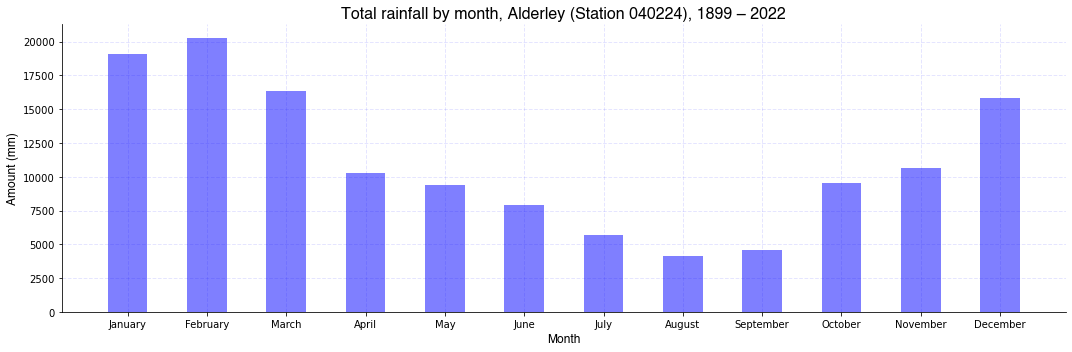

In [175]:
# Plot - Monthly rainfall (total)

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

plt.figure(figsize=(15,5))
plt.bar(alderley_monthly_total_df['Month'], alderley_monthly_total_df['Total Amount (mm)'], color="blue", 
        width=0.5, alpha=0.5)

plt.title('Total rainfall by month, Alderley (Station 040224), 1899 – 2022', fontdict = font_1)
plt.xlabel('Month', fontdict = font_2)
plt.ylabel('Amount (mm)', fontdict = font_2)

# Value labels
for i, v in enumerate(alderley_monthly_total_df['Total Amount (mm)']):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

# Aesthetics
matplotlib.pyplot.grid(visible=True, which='both', axis='both', 
                       color='blue', alpha=0.1, dash_capstyle='butt', dash_joinstyle='bevel', 
                       linestyle='--', linewidth=1)
               
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/seq-dam-levels/Images/alderley_monthly_total.png", 
            transparent=False, dpi=300)
plt.show()

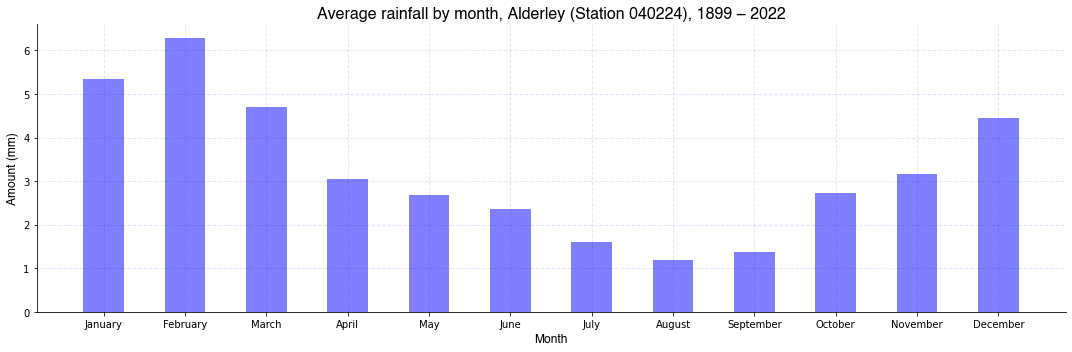

In [257]:
# Plot - Monthly rainfall (average)

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

plt.figure(figsize=(15,5))
plt.bar(alderley_monthly_avg_df['Month'], alderley_monthly_avg_df['Total Amount (mm)'], color="blue", 
        width=0.5, alpha=0.5)

plt.title('Average rainfall by month, Alderley (Station 040224), 1899 – 2022', fontdict = font_1)
plt.xlabel('Month', fontdict = font_2)
plt.ylabel('Amount (mm)', fontdict = font_2)

# Aesthetics
matplotlib.pyplot.grid(visible=True, which='both', axis='both', 
                       color='blue', alpha=0.1, dash_capstyle='butt', dash_joinstyle='bevel', 
                       linestyle='--', linewidth=1)
               
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/seq-dam-levels/Images/alderley_monthly_average.png", 
            transparent=False, dpi=300)
plt.show()

In [282]:
# Preview dam_locations_df

dam_locations_df

,dam_name,latitude,longitude,capacity_ml,current_volume,percent_full,current_status
0,Atkinson Dam,27.4137° S,152.4309° E,30401.0,30742.0,101.12%,Over Capacity
1,Bill Gunn Dam,27.3740° S,152.2237° E,6947.0,6629.0,95.42%,Near Capacity
2,Borumba Dam,26.5069° S,152.5819° E,46000.0,48022.0,104.40%,Over Capacity
3,Cedar Pocket Dam,26.2114° S,152.7924° E,735.0,769.0,104.63%,Over Capacity
4,Cooloolabin Dam,26.5469° S,152.8809° E,8183.0,8250.0,100.82%,Over Capacity
5,Enoggera Dam,27.4451° S,152.9276° E,4262.0,4445.0,104.29%,Over Capacity
6,Ewen Maddock Dam,26.7820° S,152.9927° E,16587.0,17246.0,103.97%,Over Capacity
7,Gold Creek Resevoir,27.4618° S,152.8812° E,810.0,952.0,117.53%,Over Capacity
8,Hinze Dam,28.0497° S,153.2791° E,310730.0,338595.0,108.97%,Over Capacity
9,Lake Baroon,26.7066° S,152.8706° E,61000.0,61851.0,101.40%,Over Capacity


In [191]:
# Calculate total SEQ Water Grid dam capacity

seq_water_grid_total_capacity = dam_locations_df['capacity_ml'].sum()
seq_water_grid_total_capacity

2574184.0

In [192]:
# Calculate total SEQ Water Grid dam volume (as of 7 March 2022)

seq_water_grid_total_volume = dam_locations_df['current_volume'].sum()
seq_water_grid_total_volume

2405082.0

In [190]:
# Calculate current operating % of SEQ Water Grid (as of 7 March 2022)

seq_water_grid_total_percent = (seq_water_grid_total_volume/seq_water_grid_total_capacity) * 100
seq_water_grid_total_percent

93.43085031994605

In [230]:
# Calculate tally of 'current status' column

current_status_tally = dam_locations_df['current_status'].value_counts()
current_status_tally

Over Capacity    19
Near Capacity     4
Low Capacity      2
Name: current_status, dtype: int64

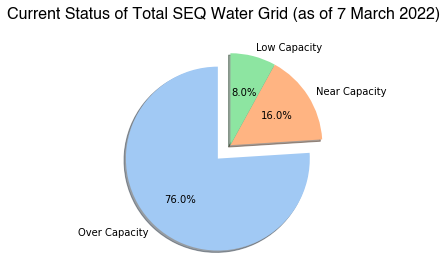

In [254]:
# Plot pie chart for SEQ Water Grid current status

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Seaborn color palette
colors = sns.color_palette('pastel')[0:5]

labels = ['Over Capacity', 'Near Capacity', 'Low Capacity']
sizes = current_status_tally
explode = (0.2, 0, 0)  # only "explode" the 1st slice ('Over Capacity')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Current Status of Total SEQ Water Grid (as of 7 March 2022)', pad=25, fontdict = font_1)

plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/seq-dam-levels/Images/dam_locations_status.png", 
            transparent=False, dpi=300)
plt.show()

In [287]:
# Plot dam locations and current status on SEQ map

atkinson = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Atkinson Dam']
bill_gunn = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Bill Gunn Dam']
borumba = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Borumba Dam']
cedar = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Cedar Pocket Dam']
cooloolabin = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Cooloolabin Dam']
enoggera = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Enoggera Dam']
ewen_maddock = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Ewen Maddock Dam']
gold_creek = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Gold Creek Resevoir']
hinze = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Hinze Dam']
baroon = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Lake Baroon']
clarendon = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Lake Clarendon']
kurwongbah = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Lake Kurwongbah']
macdonald = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Lake Macdonald']
manchester = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Lake Manchester']
tingalpa = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Tingalpa Resevoir']
little_nerang = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Little Nerang Dam']
tingalpa = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Tingalpa Resevoir']
maroon = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Maroon Dam']
moogerah = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Moogerah Dam']
nindooinbah = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Nindooinbah Dam']
north_pine = dam_locations_df.loc[dam_locations_df['dam_name'] == 'North Pine Dam']
poona = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Poona Dam']
somerset = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Somerset Dam']
wappa = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Wappa Dam']
wivenhoe = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Wivenhoe Dam']
wyaralong = dam_locations_df.loc[dam_locations_df['dam_name'] == 'Wyaralong Dam']

<AxesSubplot:>

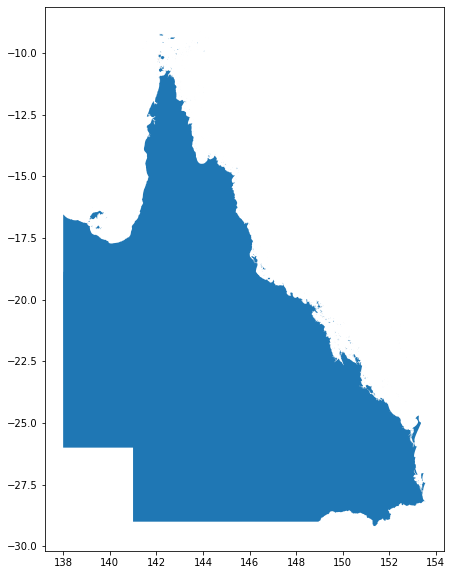

In [335]:
# Read and preview .shp file

qld_map = gpd.read_file("Resources/qld_state_polygon_shp/QLD_STATE_POLYGON_shp.shp")
fig,ax = plt.subplots(figsize = (15, 10))
qld_map.plot(ax=ax)

In [361]:
# Convert current DataFrame into Coordinated Reference System (CRS)

dam_locations_crs_df = dam_locations_df
crs="EPSG:4326"
dam_locations_crs_df

,dam_name,latitude,longitude,capacity_ml,current_volume,percent_full,current_status,geometry
0,Atkinson Dam,27.4137,152.4309,30401.0,30742.0,101.12%,Over Capacity,POINT (152.43090 27.41370)
1,Bill Gunn Dam,27.3740,152.2237,6947.0,6629.0,95.42%,Near Capacity,POINT (152.22370 27.37400)
2,Borumba Dam,26.5069,152.5819,46000.0,48022.0,104.40%,Over Capacity,POINT (152.58190 26.50690)
3,Cedar Pocket Dam,26.2114,152.7924,735.0,769.0,104.63%,Over Capacity,POINT (152.79240 26.21140)
4,Cooloolabin Dam,26.5469,152.8809,8183.0,8250.0,100.82%,Over Capacity,POINT (152.88090 26.54690)
5,Enoggera Dam,27.4451,152.9276,4262.0,4445.0,104.29%,Over Capacity,POINT (152.92760 27.44510)
6,Ewen Maddock Dam,26.7820,152.9927,16587.0,17246.0,103.97%,Over Capacity,POINT (152.99270 26.78200)
7,Gold Creek Resevoir,27.4618,152.8812,810.0,952.0,117.53%,Over Capacity,POINT (152.88120 27.46180)
8,Hinze Dam,28.0497,153.2791,310730.0,338595.0,108.97%,Over Capacity,POINT (153.27910 28.04970)
9,Lake Baroon,26.7066,152.8706,61000.0,61851.0,101.40%,Over Capacity,POINT (152.87060 26.70660)


In [362]:
# Convert lat/long columns to float datatype

dam_locations_crs_df['latitude'] = dam_locations_crs_df['latitude'].astype(float)
dam_locations_crs_df['longitude'] = dam_locations_crs_df['longitude'].astype(float)

In [364]:
# Create points based on long/lat values

geometry = [Point(xy) for xy in zip(dam_locations_crs_df['longitude'], dam_locations_crs_df['latitude'])]
geometry[:3]

In [365]:
dam_locations_geo_df = gpd.GeoDataFrame(dam_locations_crs_df, crs=crs, geometry=geometry)
dam_locations_geo_df.head()

,dam_name,latitude,longitude,capacity_ml,current_volume,percent_full,current_status,geometry
0,Atkinson Dam,27.4137,152.4309,30401.0,30742.0,101.12%,Over Capacity,POINT (152.43090 27.41370)
1,Bill Gunn Dam,27.3740,152.2237,6947.0,6629.0,95.42%,Near Capacity,POINT (152.22370 27.37400)
2,Borumba Dam,26.5069,152.5819,46000.0,48022.0,104.40%,Over Capacity,POINT (152.58190 26.50690)
3,Cedar Pocket Dam,26.2114,152.7924,735.0,769.0,104.63%,Over Capacity,POINT (152.79240 26.21140)
4,Cooloolabin Dam,26.5469,152.8809,8183.0,8250.0,100.82%,Over Capacity,POINT (152.88090 26.54690)


<AxesSubplot:>

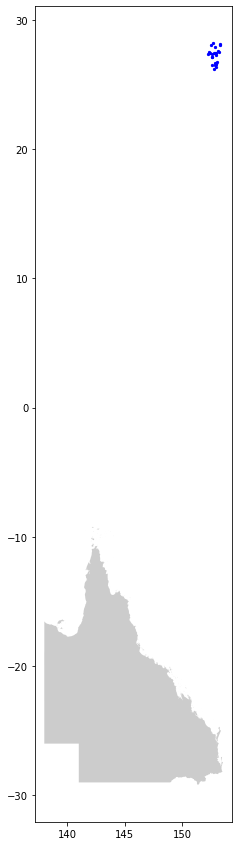

In [368]:
fig,ax = plt.subplots(figsize = (15, 15))
qld_map.plot(ax=ax, alpha=0.4, color='grey')
dam_locations_geo_df['geometry'].plot(ax=ax, markersize=5, color='blue')